<a href="https://colab.research.google.com/github/Varun0801/MachineLearning/blob/master/Polynomial_Regression_using_BostonHousing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Let's look at the following example
import numpy as np
import matplotlib.pyplot as plt


In [0]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)  # ax^2 + bx + c

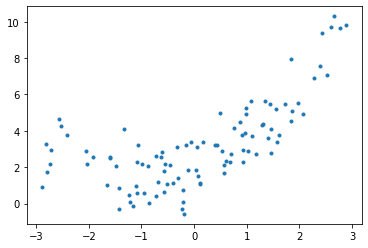

In [12]:
plt.plot(X,y,'.')

In [0]:
# Clearly a straight line will never fit this data, so let's use our Sciket-learn Polynomial features to tranform our data by adding the square(2nd degree polynomial) of each feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)


In [0]:
X_poly = poly_features.fit_transform(X)

In [15]:
X[0]


array([1.08020811])

In [16]:
X_poly[0]

array([1.08020811, 1.16684955])

In [17]:
# X_poly contains the original features of X plus the square of this features, now we can fit a Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lin_reg.coef_,lin_reg.intercept_  # alomost nearer to 0.5*X^2 + X + 2

(array([[1.09062737, 0.55055237]]), array([1.95464831]))

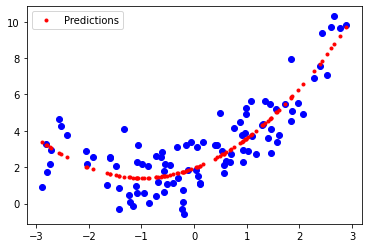

In [19]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(poly_features.fit_transform(X)),'.',color='r',label="Predictions")
plt.legend()
plt.show()

In [22]:
import pandas as pd
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [25]:
print(boston_dataset.keys())



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [26]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
boston['MEDV'] = boston_dataset.target # MEDV= Median Value
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [28]:
# Checking for missing calues
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [0]:
# Correlation should be done is order to find out what are the important features
# heatmap function from seaborn to plot my coorelation matrix 
coorelation_matrix = boston.corr().round(2)

In [30]:
coorelation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


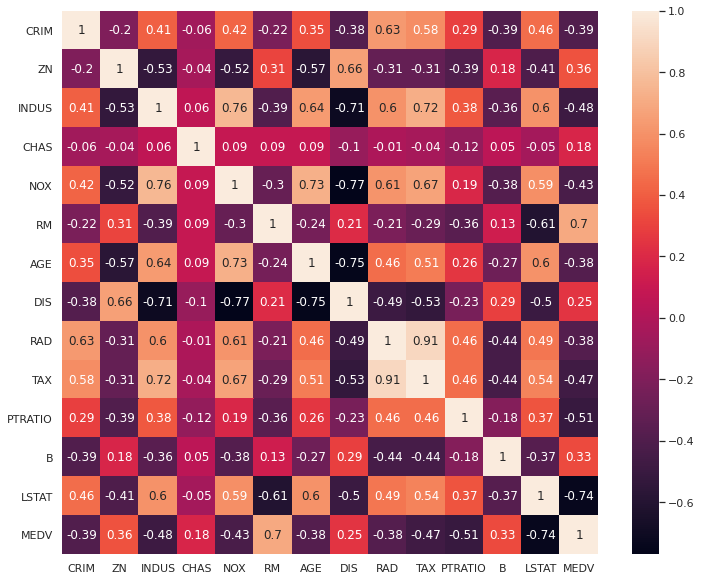

In [31]:
#Plot the coorealtion matrix in form of heatmap,ie plotting the rectangular data as a colour coded matrix
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data = coorelation_matrix,annot=True)
plt.show()

In [0]:
# Prepare the data for training
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
Y = boston['MEDV']

In [33]:
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [34]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [36]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(Y_train.shape)

(404, 2)
(404,)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_train_predict.shape

(102,)

In [43]:
# model Evaluation for both training part and testing part
y_train_predict = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)
print(rmse)
print(r2)

5.6371293350711955
0.6300745149331701


In [45]:
y_test_predict = lin_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)
print(rmse)
print(r2)

5.137400784702911
0.6628996975186952


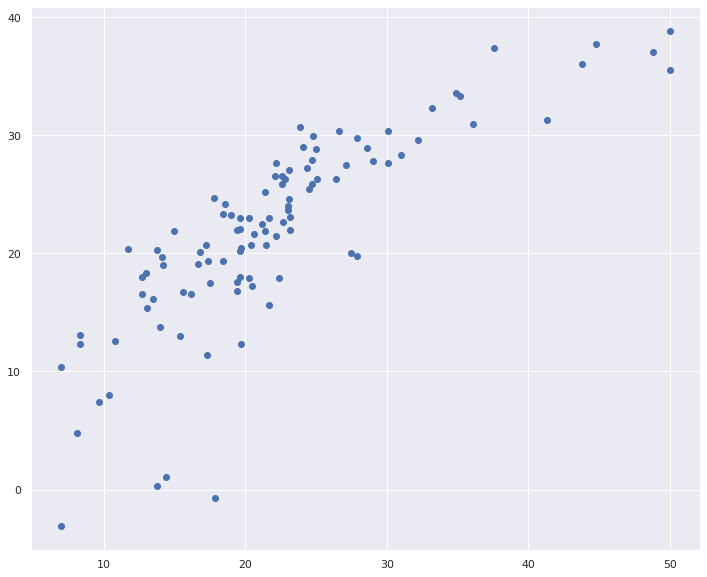

In [47]:
plt.scatter(Y_test,y_test_predict)
plt.show()

In [49]:
poly_features = PolynomialFeatures(degree=2)
# transforming the features to higher degree features
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predicting on the training dataset
y_train_predicted = poly_model.predict(X_train_poly)
# predicting on the test data
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))


In [0]:
# Evaluation 
rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predicted))
r2_train = r2_score(Y_train,y_train_predicted)
rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
r2_test = r2_score(Y_test,y_test_predict)

In [53]:
print(rmse_train)
print(r2_train)

4.703071027847756
0.7425094297364765


In [54]:
print(rmse_test)
print(r2_test)

3.784819884545044
0.8170372495892174


In [55]:
a = poly_model.predict(poly_features.fit_transform([[4.98,6.575]]))
a

array([29.55243168])